In [2]:
import batman
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

/Users/zkbt/anaconda2/envs/astroconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [9]:
params = batman.TransitParams()
params.t0 = 0.0
params.per = 10.0
params.rp = 0.1
params.a = 15.0
params.inc = 88.0
params.ecc = 0.05
params.w = 90.0
params.u = [0.1, 0.3]
params.limb_dark = "quadratic"


In [14]:
t = np.linspace(-0.5, 0.5, 100)
m = batman.TransitModel(params, t)
flux = m.light_curve(params)

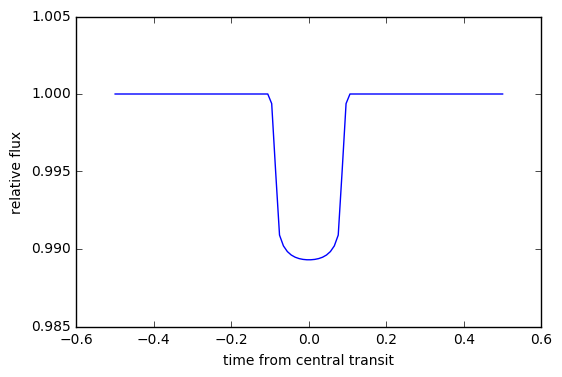

In [15]:
plt.plot(t, flux)
plt.xlabel("time from central transit")
plt.ylabel("relative flux")
plt.ylim(0.985, 1.005)
plt.show()

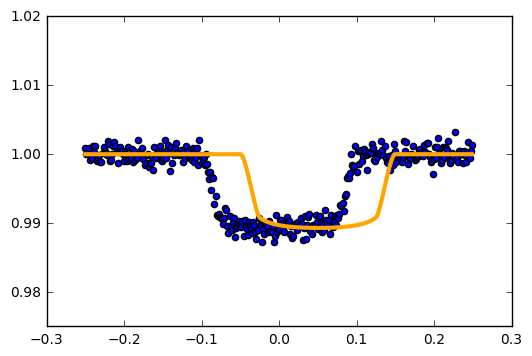

In [20]:
from simulate import simulate
times, noise = simulate()
m = batman.TransitModel(params, times)

# generate simulated data!
params.rp = 0.1
flux = m.light_curve(params)
simulateddata = flux*noise
plt.scatter(times, simulateddata)

# generate some model
params.t0 = 0.05
model = m.light_curve(params)
plt.plot(times, model, color='orange', linewidth=3)

+ Write a function to calculate $\chi^2$ as a function of the time of mid-transit (or the planet radius or other parameters).
+ Make a plot of $\chi^2$ as a function of mid-transit time.
+ Figure out how to optimize $\chi^2$ over parameters.

Ultimate goal:
+ A function that takes in planet parameters, and spits out the predicted uncertainty on the the orbital period.